METTERE NUMERI AI CAPITOLI DEL JUPYTER NOTEBOOK. FARE RIFERIMENTO A TALI NUMERI QUANDO NELL ULTIMO CAPTIOLO FACCIO RIFERIMENTO ALL ESEMPIO FATTO NEL CAPIOLO DELLE ONDE SINUSOIDALI.

VEDERE QUESTA PLAYLIST https://www.youtube.com/watch?v=hVOA8VtKLgk&list=PLuh62Q4Sv7BUSzx5Jr8Wrxxn-U10qG1et

DA FARE:

Hertz: misurano i campioni al seconod o i cicli al secondo? La definizione di ciclo è periodo dell'onda? Se dico ho fs = 44K campioni al secondo, equivale a dire che fs = 44Khz?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import cmath
import scipy
import scipy.signal

C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Giobi\AppData\Local\Continuum\anaconda3\envs\tesi\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Riferimenti libri 
- [1]: "Digital Signal Processing" (John G. Proakis, Dimitris K Manolakis, 2006, 4th Edition)

# Segnali Discreti
Un segnale discreto $x(n)$ è una funzione di una variabile intera $n$ indipendente. Se $x(n)$ è stato ottenuto campionando un segnale analogico $x_a(t)$, allora  $x(n) \equiv x_a(nT)$, dove T è il periodo di campionamento (il tempo che intercorre tra due campioni successivi). 

In tutto il notebook considereremo solo segnali discreti. 

### Funzione Delta - Unit sample sequence
Il segnale elementare per eccellenza è lo unit impulse (o unit sample sequence). Esso è definito nel seguente modo.
$$
\begin{align}
\delta(n) = \begin{cases} 1 & \mbox{se } \mbox{ $n$ = 0} \\ 0 & \mbox{$ n\neq$ 0} \end{cases}  
\end{align}
$$
### Unit step signal
Lo unit step signal $u(n)$ è definito come
$$
u(n) \equiv\left\{\begin{array}{ll}
1, & \text { for } n \geq 0 \\
0, & \text { for } n<0
\end{array}\right.
$$

### Energia e potenza del segnale
Il segnale energia $E_x$ del segnale $x(n)$ è definito nel seguente modo.
$$
\begin{align}
E_x =\sum_{n = -\infty}^{\infty} |x(n)|^2
\end{align}
$$
La potenza $P$ media del segnale $x(n)$ è definita nel seguente modo.
$$
P=\lim _{N \rightarrow \infty} \frac{1}{2 N+1} \sum_{n=-N}^{N}|x(n)|^{2}
$$
NB: Se $x(n)$ non è un segnale finito, allora neanche la sua energia è finita. Molti segnali che hanno energia infinita hanno una potenza finita. Se $E_x$ è finita, allora $P$ = 0. Se $E_x$ è infinita, $P$ può essere finita o infinita. Se $P$ è finita e non nulla, allora viene definito <i> segnale potenza. </i> 

# Le Onde Sinusoidali

### Concetti di base

##### Angoli in gradi sessagesimali e radianti
Lo standard internazionale (e anche nei linguaggi di programmazione) per definire gli angoli è il radiante. Ricorda che per passare da gradi sessagesimali a radianti, basta moltiplicare i gradi per 0,0174533 (sarebbe $\frac{\pi}{180}$). Per approfondire questo calcolo, vedi il 
<a href="https://www.youtube.com/watch?v=YusirdWOqyI" target="_blank">video spiegazione</a>.

##### Funzioni seno e coseno:
<a href="https://www.youtube.com/watch?v=nTRhhTgydW8" target="_blank">Video spiegazione</a>

### Definizione (nel discreto)

Una sinusoide è una curva che descrive un movimento oscillatorio ripetitivo. La formula della funzione sinusoidale $x(n)$ è la seguente:
$$
\begin{align}
x(n) = A \sin(\omega n + \phi) = A \sin(2\pi fn + \phi) = A \sin(\frac{2\pi}{\tau}n + \phi)
\end{align}
$$
$$
\begin{align}
 = A \cos(\omega n + \phi') = A \cos(2\pi fn + \phi') = A \cos(\frac{2\pi}{\tau}n + \phi')
\end{align}
$$

- $A$: ampiezza dell'onda. L'onda sinusoidale è compresa nel range di valori reali $[-A, A]$. L'unità di misura dell'ampiezza, dipende dall'unità di misura di $x(n)$. Intuitivamente, possiamo dire che determina quanto il suono è forte (perchè riproducendo il suono variando A, esso non cambia di volume??).

- $\omega = 2\pi f = \frac{2\pi}{\tau}$: pulsazione dell'onda misurata in radianti nell'unità di tempo (ad esempio randianti al secondo (rad/s)). Come possiamo vedere questa grandezza è direttamente proporzionale alla frequenza. Questo vuol dire che, all'aumentare della frequenza, ci sono più pulsazioni in un'unità di tempo fissata, il periodo dell'onda diminuisce, e aumenta la pulsazione. Intuitivamente, possiamo dire che determina il pitch dell'onda. 

- $f = \frac{\omega}{2\pi} = \frac{1}{\tau}$: frequenza. L'unità di misura è il numero di cicli per unità di tempo. L'unità di misura corrisponde agli Hertz se ogni campione $n$ è un secondo. In questo caso l'unità di misura sono il numero di cicli al secondo, ovvero gli Hz.

- $\phi$: fase dell'onda (espressa in radianti). Misura una traslazione della curva. Con $\phi' = \phi - \frac{\pi}{2}$


- $\tau = 1/f = \frac{2\pi}{\omega}$: periodo dell'onda. Ci dice il tempo necessario a svolgere un intero ciclo. L'unità di misura è dunque il tempo.
- $n$: vettore del tempo.

#### Esempio 

Creiamo ora una sinusoide di frequenza $f$ = 1000 Hz, di durata pari a 2 secondi e di ampiezza pari a 0.8. Il numero di campioni del file sarà pari alla durata in secondi (2) moltiplicata per la frequenza di campionamento $f_s$ = 44100. Perciò 2*44100 = 88200.

In [ ]:
A = 0.8
f = 1000 #1kHz la frequenza
phi = np.pi/2
fs = 44100
tau = 1/f
omega = 2*np.pi*f
n = np.arange(0.0, 2, 1/fs)
x = A*np.cos(2*np.pi*f*n + phi)

In [186]:
print("Il periodo è pari a {}.".format(tau))
print("Il numero di radianti al secondo è pari a {}".format(omega))

Il periodo è pari a 0.001.
Il numero di radianti al secondo è pari a 6283.185307179586


Riproduzione: 

In [187]:
ipd.Audio(x, rate = fs)

In [24]:
omega = 2*np.pi*f

Nella rappresentazione grafica faremo uno zoom sui primi 5 periodi dell'onda per rendere più comprensibile la visualizzazione.

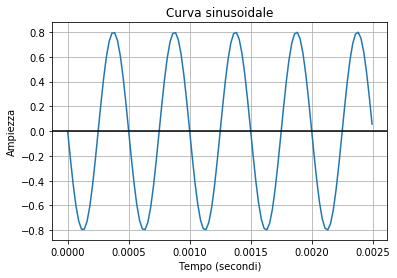

In [25]:
n_periods = 5 #numero di periodi da visualizzare
plt.plot(n[:int(tau*n_periods*fs)+1], x[:int(tau*n_periods*fs)+1])
plt.title('Curva sinusoidale')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

### Proprietà delle onde sinusoidali
- Sono periodiche solo se la frequenza $f$ è un numero razionale (dimostrato nel paragrafo Periodicità per onde sinusoidali).
- Le sinusoidi le cui frequenze sono separate da un intero multiplo di 2$\pi$ sono identiche. Per provare questa asserzione, consideriamo la sinusoide $cos(\omega_0n + \phi) = cos(2\pi f_0n + \phi)$. 
$$
\cos \left[\left(\omega_{0}+2 \pi\right) n+\phi\right]=\cos \left(\omega_{0} n+2 \pi n+\phi\right)=\cos \left(\omega_{0} n+\phi\right)
$$
Come risultato, tutte le sinusoidi del tipo
$$
x_{k}(n)=A \cos \left(\omega_{k} n+\phi\right), \quad k=0,1,2, \ldots
$$
dove
$$
\omega k=\omega_{0}+2 k \pi, \quad-\pi \leq \omega_{0} \leq \pi
$$
sono identiche. Da notare che abbiamo scritto $-\pi \leq \omega_{0} \leq \pi$. Questo equivale a dire $-\frac{1}{2} \leq f \leq \frac{1}{2}$. Perciò per un valore maggiore di $\frac{1}{2}$, o minore di $-\frac{1}{2}$, ho il fenomeno di aliasing. Questo porta ad un'altra conseguenza interessante: ogni sequenza sinusoidale con $|\omega|>\pi,$ è identica almeno ad un'altra sequenza che si può ottenere con una pulsazione  $|\omega|<\pi .$ Inoltre, se $-\pi \leq \omega \leq \pi,$ allora $-\frac{1}{2} \leq f \leq \frac{1}{2}$. Perciò, riassumendo, ogni sequenza sinusoidale con $|\omega|>\pi,$ (o $|f|>\frac{1}{2}$) è un alias di un'altra sequenza con frequenza inferiore. 
##### NB IMPORTANTE: 
Teniamo a mente che $ f = \pm \frac{1}{2}$ è il limite massimo nell'unità di tempo! Cioè consideriamo di avere un campione per ogni unità di tempo $n$, (ogni campione $n$ poi può essere 1 secondo, 1 minuto, e così via). La proprietà appena scritta ci dice che la massima frequenza che si può registrare è pari ad $\pm \frac{1}{2}$ cicli per campione. Cioè in altre parole, il limite massimo è avere 1 ciclo completo ogni due campioni. Questo però non vuol dire che la frequenza massima è 0.5 Hertz. Gli Hertz sono misurati in numero di cicli al secondo! Se non è ancora chiaro, analizziamo vari casi:
    - Se prendo come frequenza di campionamento 1 Hz, vuol dire che ho 1 campione al secondo. In questo caso sì, il limite massimo è di frequenza è 0.5 Hertz. 
    - Se la frequenza di campionamento è ad esempio 10 Hz, vuol dire che ho 10 campioni al secondo. Visto che la massima frequenza è mezzo ciclo per campione, allora in questo caso posso al massimo avere 5 cicli completi in un secondo. Perciò il limite massimo di frequenza in Hertz è pari a 5. Ogni frequenza > 5 Hz genererà una curva che è semplicemente un alias di una sinusoide con frequenza < 5 Hz. In altre parole, se volessi riprodurre una frequenza > 5 Hz, dovrei aumentare la frequenza di campionamento. Se invece volessi creare, a questa frequenza di campionamento, una sinusoide con frequenza ad esempio = 6 Hz, otterrei un alias della sinusoide con frequenza inferiore. Questo è il principio del teorema del campionamento in effetti (vedi paragrafo sul teorema del campionamento): quando vado a campionare, devo scegliere una frequenza di campionamento che è pari almeno al doppio della massima frequenza. Una frequenza pari a 6 Hz potrebbe essere riprodotta solo con una frequenza di campionamento pari almeno al doppio di 6, ovvero 12 Hz. Con 12 Hz di frequenza di campionamento, infatti, avrei 6 cicli completi (mezzo ciclo per campione).

- Il maggior valore di $\omega$ è $\pm\pi$ (e il maggior valore della frequenza è $f = \pm\frac{1}{2}$). <i> Dimostrato a pag. 17 del libro [1], ma è intuitivo. </i>

#### Esempio 1
Consideriamo il seguente segnale
$$
x(n) = \cos(2\pi fn) \quad \text{con }f = \frac{1}{2}Hz
$$
Vediamo come vari la curva al variare della frequenza di campionamento. Il confronto avverrà dunque tra due segnali definiti in un numero fissato di secondi, che sarà pari a 10. La differenza è che per il segnale $x_1$ la frequenza di campionamento è $fs_1$ = 1 Hz, mentre per $x_1$ la frequenza di campionamento è $fs_2$ = 10 Hz. La frequenza in Hertz della funzione è sempre la stessa, ed è 0.5, perciò la funzione sinusoidale è la stessa: una sinusoide con frequenza pari a 0.5 Hz. Solo che nel primo caso ho una frequenza di campionamento pari a 1 campione al secondo (che è la minima per poter rappresentare tale frequenza), mentre nel secondo caso ho ben 10 campioni al secondo. Questo mi permette di visualizzare la curva in modo più liscio. Ovviamente, cambia il vettore n. Infatti:
- n1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] (lunghezza pari a 10)
- n2 = [0, 0.1, 0.2, 0.3, 0.4, ..., 9.9] (lunghezza pari a 100)

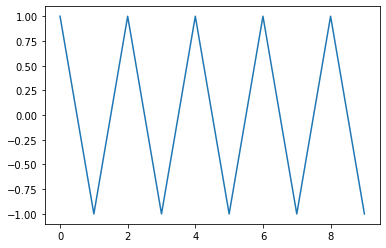

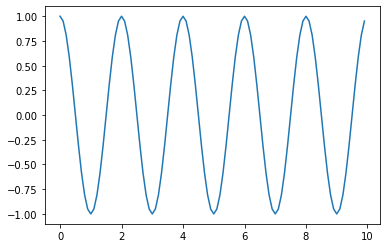

In [246]:
f = 0.5
fs1 = 1 #1 Hz
n1 = np.arange(0, 10, 1/fs1)
x1 = np.cos(2*np.pi*f*n1)
plt.plot(n1, x1)
plt.show()

fs2 = 10 #10 Hz
n2 = np.arange(0, 10, 1/fs2)
x2 = np.cos(2*np.pi*f*n2)
plt.plot(n2, x2)
plt.show()

#### Esempio 2
Vediamo ora un secondo esempio. Consideriamo il segnale $x(n)$.
$$
x_1(n) = \cos(2\pi f_1n) \quad \text{con }f_1 = \frac{1}{2}Hz \\
x_2(n) = \cos(2\pi f_2n) \quad \text{con }f_2 = \frac{1}{2}Hz
$$
In questo caso fissiamo la frequenza di campionamento a 100 campioni al secondo (100 Hz). Perciò il vettore n è del tipo:

n = [0, 0.1, 0.2, 0.3, 0.4, ..., 9.9] (lunghezza pari a 100)

Vogliamo rappresentare due segnali con diverse frequenze, ovvero $f_1 = 90Hz$ e $f_2 = 10Hz$. Come possiamo vedere dai plot i risultati sono identici. Questo perchè siamo di fronte ad un fenomeno di aliasing. In effetti, 90 Hertz con una frequenza di campionamento di 100 Hz corrisponde a 0.9 ($\frac{90}{100}$) cicli per campione. Visto che il massimo è 0.5 cicli per campione, siamo sopra al limite consentito. 

NB: MIA SUPPOSIZIONE 
Da quello che emerge in questo esempio, mi verrebbe da pensare che vale la seguente relazione:
$$
cos(2\pi(f_{lim} + x)n) = cos(2\pi(f_{lim} - x)n)
$$
In questo esempio: $x = 0.4\text{(cicli al per campione) = 40 Hz}$ e $f_{lim} = 50Hz = 0.5\text{(cicli al per campione})$.

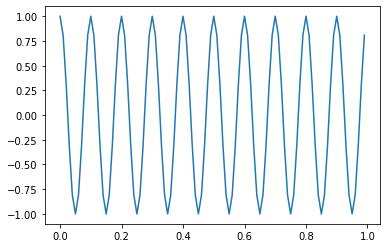

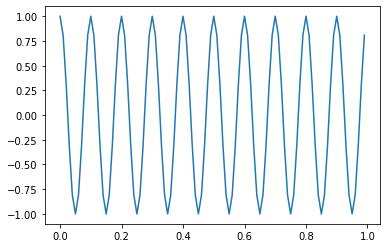

In [267]:
fs = 100
f = 10

n = np.arange(0,1,1/fs)
f = 0.9 / n[1] #90 Hz
x = np.cos(2*np.pi*f*n)
plt.plot(n, x)
plt.show()

x = np.cos(2*np.pi*f*n)
plt.plot(n, x)
plt.show()

# Teorema del campionamento

Il teorema del campionamento (o teorema di Nyquist-Shannon) afferma che, per campionare correttamente (<i>"senza perdita di informazioni*" </i>) un segnale a banda limitata, è sufficiente campionarlo con una frequenza di campionamento pari almeno al doppio della massima frequenza del segnale (tale frequenza viene anche detta frequenza di Nyquist). 

\* <i> "senza perdita di informazioni" </i>: vuol dire che si evita il fenomeno di aliasing, ma è ovvio che campionando un segnale alcune informazioni si perdono. Ad esempio: se il segnale è un'onda sinusoidale, le seguenti caratteristiche del segnale vengono mantenute:
- oscillazione in un range di valori compreso in $[-A, A]$.
- la frequenza $f$ rimane la stessa (così come $\tau$ e $\omega$, ovviamente).

Ciò che invece si perde, è l'informazione relativa all'ampiezza. Sostanzialmente nell'esempio riportato qui in alto, l'onda sinusoidale di frequenza pari a 1000 ha un'ampiezza costante pari a 0.8. Questo tipo di informazione, nel momento in cui si va a campionare, si perde. Dimostriamolo conun esempio.

#### Esempio 1
Nell'esempio scritto in precedenza, ho un'onda sinusoidale di frequenza pari a mille. La frequenza di Nyquist è dunque pari a 1000\*2 = 2000 campioni al secondo. Sappiamo dunque che $F_{max\_intensità}$ = 1000, perciò se $F_s$ > 2$F_{max}$ allora il segnale sarà ricostruito, altrimenti avremo dell'aliasing.

Se prendo un campione ogni 22, il segnale campionato risulta essere lungo 4010 campioni (2005 campioni al secondo). Essendo la mia frequenza di campionamento pari a 2005 Hz (che è >= 1000 Hz), posso ricostruire perfettamente il segnale originale.
Come possiamo vedere dal grafico riportato in basso, l'informazione relativa all'ampiezza costante si è persa, ma è rimasta invariata la forma sinusoidale e la frequenza originale dell'onda.

La frequenza di campionamento è pari a 2005.0, mentre la frequenza di Nyquist è 2000.


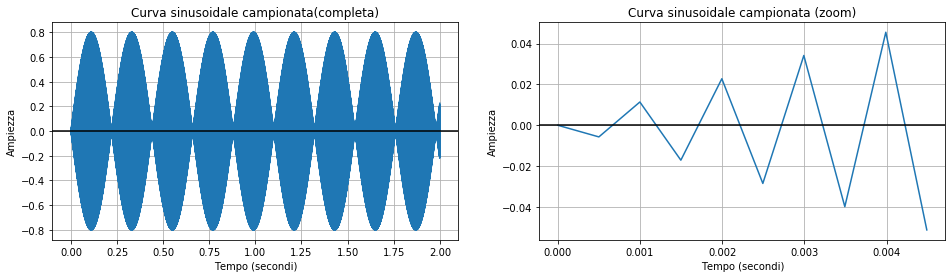

In [188]:
f = 1000 
fs = 44100
new_x = x[::22]
nyq_freq = f*2 #frequenza di Nyquist 
new_fs = fs/22

print("La frequenza di campionamento è pari a {}, mentre la frequenza di Nyquist è {}.".format(len(new_x)/2, nyq_freq)) 

#controllo se la nuova freq di campionamento è maggiore della freq di nyq
assert new_fs >= nyq_freq

new_n = np.arange(0.0, 2, 1/new_fs)

fig, axs = plt.subplots(1,2, figsize=(16, 4))
axs[0].plot(new_n, new_x)
axs[0].set_title('Curva sinusoidale campionata(completa)')
axs[0].set_xlabel('Tempo (secondi)')
axs[0].set_ylabel('Ampiezza')
axs[0].grid(True, which='both')
axs[0].axhline(y=0, color='k')
axs[1].plot(new_n[:10], new_x[:10])
axs[1].set_title('Curva sinusoidale campionata (zoom)')
axs[1].set_xlabel('Tempo (secondi)')
axs[1].set_ylabel('Ampiezza')
axs[1].grid(True, which='both')
axs[1].axhline(y=0, color='k')

# plot.plot(new_t[:10], new_x[:10])
# plot.title('Curva sinusoidale')
# plot.xlabel('Tempo (secondi)')
# plot.ylabel('Ampiezza')
# plot.grid(True, which='both')
# plot.axhline(y=0, color='k')
# plot.show()

#### Come mai il file non si riesce a riprodurre ?
E' sicuramente un problema di ipd.Audio, perchè se salvo il file con il seguente codice e poi lo riproduco con un qualsiasi software che legge il formato wav, si riesce a sentire.

``` python
import scipy.io.wavfile
scipy.io.wavfile.write('onda_campionata.wav', int(new_fs), np.array(new_x, dtype = np.float32))
``` 

In [189]:
ipd.Audio(np.array(new_x, dtype = np.float32), rate = int(new_fs))

#### Esempio 2 - Aliasing
Se invece provo a campionare con una freq. di campionamento inferiore alla freq. di Nyquist, allora si può sentire anche ad orecchio come cambia la frequenza.

La frequenza di campionamento è pari a 1470.0, mentre la frequenza di Nyquist è 2000.


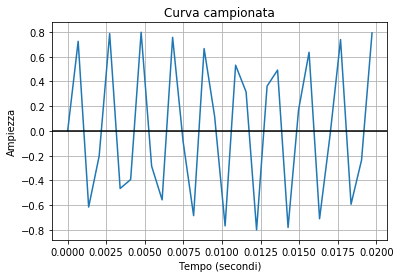

In [200]:
new_x = x[::30]
new_fs = fs/30
new_n = np.arange(0.0, 1, 1/new_fs)
print("La frequenza di campionamento è pari a {}, mentre la frequenza di Nyquist è {}.".format(len(new_x)/2, nyq_freq)) 
ipd.Audio(np.array(new_x, dtype = np.float32), rate = int(new_fs))

plt.plot(new_n[:30], new_x[:30])
plt.title('Curva campionata')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

#  Numeri Complessi $\mathbb{C}$

### Introduzione

Consideriamo l'insieme delle coppie ordinate di numeri reali $(a, b)$ e su queste definiamo le operazioni di somma e prodotto:

- $(a, b) + (c, d) = (a + c, b + d)$
- $(a, b)*(c, d) = (ac - bd, ad + bc)$

Si può dimostrare che le operazioni appena definite godono delle stesse proprietà definite nell'insieme dei numeri reali $\mathbb{R}$ (come le proprietà associativa, distributiva, etc..). Questi nuovi "oggetti a due componenti" sono definiti <b> numeri complessi</b>. 

Possiamo notare che i numeri del tipo $(a, 0)$ sono i numeri reali. Ovvero: $(a, 0) \in \mathbb{R}$.

Un numero molto importante, detto <b> unità immaginaria</b>, è il numero (0, 1). Questo numero, che si indica con $j$, gode di questa interessante proprietà:
$$
\begin{align}
j^2 = (0, 1)*(0, 1) = (-1, 0) = -1
\end{align}
$$
Perciò l'unità $j$, è una delle possibili soluzioni dell'equazione $x^2 = -1$, che nell'insieme dei numeri reali non ammetteva soluzione.



Alla luce di queste considerazioni, possiamo definire un numero complesso nel seguente modo:
$$
\begin{align}
(a, b) = (a, 0) + (0, 1)*(b, 0) = a + jb
\end{align}
$$

In genere, si indica con:
$$
\begin{align}
z = a + jb
\end{align}
$$

Quella appena definita è detta <b> forma cartesiana</b> del numero complesso. NB: $a$ prende il nome di <i> parte reale</i> (perchè risiede nell'asse reale del piano di Gauss), mentre $b$ prende il nome di <i> parte immaginaria</i> (perchè risiede nell'asse immaginario del piano di Gauss) del numero complesso.

<a href="https://www.youtube.com/watch?v=R2b0XF0M8jY" target="_blank">Video spiegazione</a>

### Operazioni in forma cartesiana tra numeri complessi
Siano $z_1 = a + jb$ e $z_2 = c + jd$ due numeri complessi.  
<b><center>Somma e differenza</center></b>
$$
\begin{align}
z_1 \pm z_2= (a \pm c) + j(b \pm d)
\end{align}
$$
<b><center>Prodotto</center></b>
$$
\begin{align}
z_1 * z_2= (ac - bd) + j(ad + bc)
\end{align}
$$
<b><center>Rapporto</center></b>
$$
\begin{align}
\frac{z_1}{z_2} = \frac{ac + bd}{c^2 + d^2} + j\frac{bc - ad}{c^2 + d^2}
\end{align}
$$


<a href="https://www.youtube.com/watch?v=z_UyoLTj5C4" target="_blank">Video spiegazione</a>

### Forma Cartesiana, Trigonometrica ed Esponenziale
Abbiamo visto che i numeri complessi scritti in forma cartesiana sono descritti dalle parti reali e immaginarie $a$ e $b$. Le coordinate cartesiane $a$ e $b$ possono essere dei reali qualunque e coordinate diverse identificano punti diversi. Ma un punto $z$ nel piano di Gauss, può essere identificato anche grazie ad altri due parametri: $r \geq 0$ e $\theta \in [0,2 \pi]$. Concettualmente, $r$ non è altro che la distanza del punto dall'origine, mentre $\theta$ è l'angolo che tra la retta che congiunge il punto $z$ con l'origine e il semiasse positivo delle ascisse (asse reale). 

Ricapitolando, i punti dello spazio di Gauss, possono essere individuati in due modi:
- dalle coordinate cartesiane $a$ e $b \rightarrow$ forma cartesiana. 
- dalle coordinate polari $r$ e $\theta \rightarrow$ forme trigonometrica ed esponenziale. NB: Spesso  $r$ e $\theta$ appaiono con il nome rispettivamente di $modulo$ e $argomento$ (o $fase$) di $z$. In questo caso si usa la notazione $r = |z|$ e $\theta = \measuredangle z$.

Le tre forme per rappresentare i numeri complessi sono dunque:

<b><center>Forma cartesiana</center></b>
$$
\begin{align}
z = a + jb
\end{align}
$$
<b><center>Forma trigonometrica</center></b>
$$
\begin{align}
z = r(\cos\theta + j \sin\theta)
\end{align}
$$
<b><center>Forma esponenziale</center></b>
$$
\begin{align}
z = r e^{j\theta}
\end{align}
$$

Si noti che il legame tra la forma esponenziale e trigonometrica deriva dall'identità di Eulero, secondo la quale: 
$$
\begin{align}
e^{jA} = \cos A + j \sin A.
\end{align}
$$
$$
\begin{align}
\cos A = \frac{e^{jA} + e^{-jA}}{2}\\
\end{align}
$$
$$
\begin{align}
\sin A = \frac{e^{jA} - e^{-jA}}{2j}
\end{align}
$$

Si può dimostrare che valgono le seguenti relazioni:

- $a = r\cos\theta$
- $b = r\sin\theta$
- $r = \sqrt{a^2 + b^2}$
- $\theta = \begin{cases} arctg(\frac{b}{a}), & \mbox{se } a\mbox{ > 0} \\ arctg(\frac{b}{a}) + \pi, & \mbox{se } a\mbox{ < 0} \\ \frac{\pi}{2}, & \mbox{se } a\mbox{ = 0 & } b\mbox{ > 0}
\\ \frac{3}{2}\pi, & \mbox{se } a\mbox{ = 0 & } b\mbox{ < 0}
\\ \textrm{Non definito}, & \mbox{se } z\mbox{ = 0 }\end{cases}$

Vediamo ora le operazioni in forma trigonometrica. Siano $z_1 = r_1(\cos\theta_1 + j \sin\theta_1)$ e $z_2 = r_2(\cos\theta_2 + j \sin\theta_2)$ due numeri complessi.  
<b><center>Somma e differenza</center></b>
$$
\begin{align}
z_1 \pm z_2 = r_1\cos\theta_1 \pm r_2\cos\theta_2 + j(r_1\sin\theta_1 \pm r_2\sin\theta_2)
\end{align}
$$
<b><center>Prodotto</center></b>
$$
\begin{align}
z_1 * z_2 = r_1r_2[\cos(\theta_1 + \theta_2) + j \sin(\theta_1 + \theta_2)]
\end{align}
$$
<b><center>Rapporto</center></b>
$$
\begin{align}
\frac{z_1}{z_2} = \frac{r_1}{r_2}[\cos(\theta_1 - \theta_2) + j \sin(\theta_1 - \theta_2)]
\end{align}
$$

Infine, vediamo ora le operazioni in forma esponenziale. Siano dunque $z_1 = r_1 e^{j\theta_1}$ e $z_2 = r_2 e^{j\theta_2}$ due numeri complessi.  

<b><center>Somma e differenza</center></b>
$$
\begin{align}
z_1 \pm z_2 = r_1 e^{j\theta_1} \pm r_2 e^{j\theta_2}
\end{align}
$$
<b><center>Prodotto</center></b>
$$
\begin{align}
z_1 * z_2 = r_1r_2 e^{j(\theta_1 + \theta_2)}
\end{align}
$$
<b><center>Rapporto</center></b>
$$
\begin{align}
\frac{z_1}{z_2} = \frac{r_1}{r_2}e^{j(\theta_1 - \theta_2)}
\end{align}
$$

NB I numeri complessi in forma esponenziale sono molto utili in quanto, spesso, le operazioni sono più semplici rispetto all'applicazione delle stesse con i numeri complessi scritti in forma trigonometrica. 

<a href="https://www.youtube.com/watch?v=JE0lnOZzQEw" target="_blank">Video spiegazione</a>

Ulteriori video spiegazione sui numeri complessi sono di seguito disponibili:

<a href="https://www.youtube.com/watch?v=CKnEHwZNi-Y" target="_blank">Radici e potenze</a>

<a href="https://www.youtube.com/watch?v=5l3tc_rZQr0" target="_blank">Equazioni pt.1</a>

<a href="https://www.youtube.com/watch?v=8W1Oa0Uc-n8" target="_blank">Equazioni pt.2</a>

#### Esempio
Vediamo i numeri complessi in Python. I numeri complessi sono storati internamente in forma cartesiana. 

In [23]:
a = 1 #parte reale
b = 4 #parte immaginaria
z = a + b*1j #In alternativa si può inizializzare con z = complex(a,b)
print(z)

(1+4j)


In [3]:
import cmath
a = -2
b = 0
z = a + b*1j 
cmath.phase(z)

3.141592653589793

In [24]:
print("La parte reale del numero complesso z è {}.".format(z.real))
print("La parte immaginaria del numero complesso z è {}.".format(z.imag))
print("Il modulo del numero complesso z è {}.".format(abs(z)))
print("La fase del numero complesso z è {}.".format(cmath.phase(z))) # cmath.phase è equivalente a math.atan2(z.imag, z.real)

La parte reale del numero complesso z è 1.0.
La parte immaginaria del numero complesso z è 4.0.
Il modulo del numero complesso z è 4.123105625617661.
La fase del numero complesso z è 1.3258176636680326.


La coppia di coordinate polari ($r$, $\theta$) la si può ottenere con:
```python
r, theta = cmath.polar(z)
``` 
Per passare invece dalle coordinate polari alla forma cartesiana, si può utilizzare il metodo:
```python
z = cmath.rect(r, theta)
``` 
Ulteriori funzioni per lavorare con i numeri complessi sono disponibili nella <a href="https://docs.python.org/2/library/cmath.html" target="_blank">documentazione</a>.

# Onde Sinusoidali Complesse

### Definizione

Le onde sinusoidali complesse sono importanti perchè le trasformate di Fourier si basano su di esse. La formula generica è la seguente.

$$
\begin{align}
x(n) = A \cos(\omega n + \phi) + j A \sin(\omega n + \phi) = A e^{j(\omega n + \phi)}
\end{align}
$$

I segnali $\sin(\omega n + \phi)$ e $\cos(\omega n + \phi)$ possono essere ottenuti con combinazioni lineari di onde sinusoidali complesse.
$$ \begin{array}{l}
\cos \left(\omega n+\phi\right)=\frac{1}{2}\left(e^{j\left(\omega n+\phi\right)}+e^{-j\left(\omega n+\phi\right)}\right) \\
\sin \left(\omega n+\phi\right)=\frac{1}{2 j}\left(e^{j\left(\omega n+\phi\right)}-e^{-j\left(\omega n+\phi\right)}\right)
\end{array}$$

#### Esempio
Andiamo a creare un'onda sinusoidale complessa.
$$
\begin{align}
x(n) = e^{j(2\pi f n)} \qquad f = 0.001 \text{ cicli/unità_tempo } = 44.1Hz
\end{align}
$$

In [89]:
A = 1
fs = 44100
n = np.arange(0.0, 0.1, 1/fs)
f = 0.001/n[1]
tau = 1/f
phi = 0
x_complex = A*np.cos(2*np.pi*f*n + phi) + 1j*A*np.sin(2*np.pi*f*n + phi)

In questo caso andremo a visualizzare sia la componente reale, sia la componente immaginaria dell'onda. Come possiamo vedere, si tratta della stessa curva, shiftata di $\frac{\pi}{2}$.

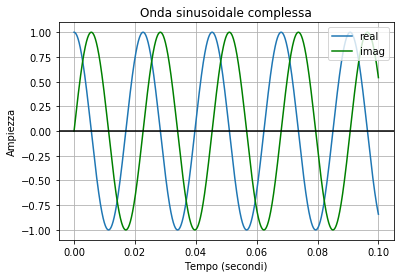

In [90]:
plt.plot(n, x_complex.real, label = 'real')
plt.plot(n, x_complex.imag, 'green', label = 'imag')
plt.title('Onda sinusoidale complessa')
plt.xlabel('Tempo (secondi)')
plt.ylabel('Ampiezza')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.legend(loc='upper right')
plt.show()

# Classificazione dei segnali discreti

### Segnali periodici
Un segnale $x(n)$ è detto periodico, con periodo N, se:
$$
\begin{align}
x(n + N) = x(n) \qquad \forall n
\end{align}
$$

Se non c'è nessun $N \in \mathbb{R}$ tale per cui valga questa relazione, allora il segnale non è periodico. 
Il valore di $N$ più piccolo per il quale vale la relazione appena scritta, è detto <i> periodo fondamentale </i>, e lo possiamo indicare con $N_0$ (credo che coincida con $\tau$ nel caso di onde sinusoidali). Il periodo fondamentale è un numero reale, mentre nei teoremi che verranno di seguito esposti il valore $N$ apparterrà all'insieme dei numeri naturali.

##### Periodicità per onde sinusoidali
Le onde sinusoidali (nel discreto) sono segnali periodici? Non sempre! Consideriamo ad esempio il segnale 
$$
\begin{align}
x(n) = A \cos(\omega n + \phi)
\end{align}
$$
Affinchè esso sia periodico, deve valere la seguente uguaglianza.
$$
\begin{align}
x(n) \text{ è periodico} \Longleftrightarrow A \cos(\omega n + \phi) = A \cos(\omega n + \omega N + \phi)
\end{align}
$$
Questa condizione appena scritta, si verifica solo se la quantità $\omega N$ è un multiplo di $2 \pi$. Potremmo dunque riscrivere la condizione di periodicità per segnali sinusoidali nel seguente modo.
$$
\begin{align}
x(n) \text{ è periodico} \Longleftrightarrow \omega N = 2 \pi m \\
2 \pi f N = 2 \pi m \\
f = \frac{m}{N}
\end{align}
$$

dove $m$ è un intero positivo. Visto che $m, N \in \mathbb{N}$, possiamo concludere che un segnale sinusoidale $x(n)$ è periodico di periodo $N \Longleftrightarrow \exists$ un valore $m$ tale che $f$ sia razionale. In altre parole, se la sua frequenza $f$ è esprimibile sottoforma di rapporto tra due numeri $m, N \in \mathbb{N}$ in cui $N$ è il periodo del segnale, allora $x(n)$ è periodico.

##### Periodicità per onde sinusoidali complesse
Sostanzialmente il risultato è lo stesso delle onde sinusoidali, ma la dimostrazione è diversa.
Consideriamo il seguente segnale:
$$
\begin{align}
x(n) = A e^{j(\omega n + \phi)}
\end{align}
$$
Analizziamo in che condizioni è periodico. 
$$
\begin{align}
x(n) \text{ è periodico} \Longleftrightarrow A e^{j(\omega n + \phi)} = A e^{j(\omega n + \omega N + \phi)}\\
A e^{j(\omega n + \phi)} = A e^{j(\omega n + \phi)} e^{j(\omega N)}
\end{align}
$$

Questa condizione appena scritta, si verifica solo se la quantità $e^{j(\omega N)}$ è pari ad 1. Potremmo dunque riscrivere la condizione di periodicità per segnali sinusoidali nel seguente modo.
$$
\begin{align}
x(n) \text{ è periodico} \Longleftrightarrow  e^{j(\omega N)} = 1 \\
\cos(\omega N) + j \sin(\omega N) = 1 \\
\cos(2\pi f N) + j \sin(2\pi f N) = 1
\end{align}
$$
Questa condizione appena scritta, si verifica solo se la quantità $2\pi f N$ è pari ad un multiplo di $2\pi$, perchè così avrei $\cos(2 \pi m) = 1, \sin(2 \pi m) = 0$.

$$
\begin{align}
x(n) \text{ è periodico} \Longleftrightarrow 2\pi f N = 2\pi m \\
f = \frac{m}{N}
\end{align}
$$

Anche in questo caso ovviamente $m, N \in \mathbb{N}$. Possiamo dunque concludere che un segnale sinusoidale complesso $x(n)$ è periodico di periodo $N \Longleftrightarrow \exists$ un valore $m$ tale che $f$ sia razionale.

Come mai in questi teoremi sulla periodicità per le onde sinusoidali $N \in \mathbb{N}$, mentre nella definizione $N \in \mathbb{R}$? Il senso è questo: se un segnale è periodico, allora il suo periodo fondamentale è $N_0$ che è un numero reale, che può essere ad esempio $\frac{5}{2}$. Il suo intero multiplo più vicino è pari a 5, perciò applicando questo teorema su un segnale periodico di periodo fondamentale $N_0$ = $\frac{5}{2}$, la $N$ risultante sarà 3. Applicando dunque il teorema ad un segnale con periodo fondamentale razionale non intero, non otteniamo $N$ = $N_0$, bensì otterremo una $N$ multipla di $N_0$. Il teorema non ci garantisce dunque di trovare il periodo fondamentale di un segnale, ma ci è utile solo per capire se un segnale è periodico o no! 

#### Esempio
Facciamo un esempio. Consideriamo il segnale $x(n) = \cos(2\pi \frac{2}{5} n + \pi)$ e vediamo se è periodico (con $f=\frac{2}{5}\text{ cicli/unità_tempo}$. Visto che $f = \frac{2}{5}$, possiamo direttamente dire che è periodico. In questo caso $m$ = 2 e il suo periodo è $N = 5$. Il periodo fondamentale è invece $N_0 = \frac{5}{2}$

La frequenza espressa in Hertz è 4.0


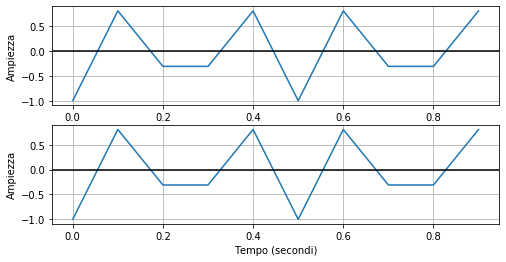

In [111]:
A = 1
phi = np.pi
fs = 10
omega = np.pi
t = np.arange(0.0, 1, 1/fs)
f = (2/5)/t[1]
print("La frequenza espressa in Hertz è {}".format(f))
tau = 1/f
x = A*np.cos(2*np.pi*f*t + phi)

period = 3
x_shift = A*np.cos(2*np.pi*f*(t + period) + phi)

fig, axs = plt.subplots(2,1, figsize=(8, 4))
axs[0].plot(t, x)
axs[0].set_xlabel('Tempo (secondi)')
axs[0].set_ylabel('Ampiezza')
axs[0].grid(True, which='both')
axs[0].axhline(y=0, color='k')
axs[1].plot(t, x_shift)
axs[1].set_xlabel('Tempo (secondi)')
axs[1].set_ylabel('Ampiezza')
axs[1].grid(True, which='both')
axs[1].axhline(y=0, color='k')

Prendiamo ora il caso di un segnale non periodico, in cui cioè la frequenza dell'onda è un numero irrazionale, come $\frac{1}{\pi}$ cicli/unità_di_tempo. In questo caso, il segnale dovrebbe essere non periodico, in quanto non esistono due numeri interi che rapportati diano $\frac{1}{\pi}$. Eppure con il valore di $N = \tau = \pi$ il segnale risulta periodico. Come mai? Il motivo è puramente fisico. Un computer non può rappresentare numeri irrazionali, ma può semplicemente approssimarli. Anche il numero $\frac{1}{\pi} = 0.3183098861837907...$ è storato nel pc come il rapporto tra due numeri interi molto grandi, come $\frac{3183098861837907}{10^{16}}$, che sono comunque numeri interi. Questo limite fisico dei pc va tenuto in considerazione in molti problemi reali, come il calcolo delle orbite. In ogni caso, la differenza tra l'approssimazione del pc e il vero valore di $\frac{1}{\pi}$ è trascurabile, per ciò che ci riguarda. Quindi anche se matematicamente quello che segue è un esempio inesatto, lo si può prendere per buono considerandolo come un'approssimazione della realtà. 

La frequenza espressa in Hertz è 63.66197723675814


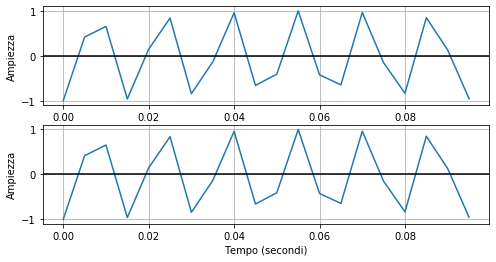

In [129]:
A = 1
phi = np.pi
fs = 200
omega = np.pi
t = np.arange(0.0, 0.1, 1/fs)
f = (1/np.pi)/t[1]
print("La frequenza espressa in Hertz è {}".format(f))
tau =1/f
x = A*np.cos(2*np.pi*f*t + phi)


period = tau
x_shift = A*np.cos(2*np.pi*f*(t + period) + phi)

fig, axs = plt.subplots(2,1, figsize=(8, 4))
axs[0].plot(t, x)
axs[0].set_xlabel('Tempo (secondi)')
axs[0].set_ylabel('Ampiezza')
axs[0].grid(True, which='both')
axs[0].axhline(y=0, color='k')
axs[1].plot(t, x_shift)
axs[1].set_xlabel('Tempo (secondi)')
axs[1].set_ylabel('Ampiezza')
axs[1].grid(True, which='both')
axs[1].axhline(y=0, color='k')

##### Energia e potenza per segnali periodici
Consideriamo un segnale periodico $x(n)$ di periodo $N$. L'energia e la potenza del segnale variano a seconda dell'intervallo preso in considerazione. Distinguiamo i vari casi:
- Se prendiamo in considerazione l'intervallo $0\leq n \leq N-1$, e $x(n)$ assume valori finiti in tale intervallo, allora l'energia è finita e la potenza è nulla.
- Se prendiamo in considerazione l'intervallo -$\infty\leq n \leq\infty$, allora l'energia è infinita e la potenza media è pari alla potenza media in un singolo periodo. Ovvero:
$$
P_x = \frac{1}{N}\sum_{n=0}^{N-1}|x(n)|^2
$$
Di conseguenza, i segnali periodici sono segnali potenza.

### Esponenziali complessi in relazione armonica (a tempo discreto)
Abbiamo visto (periodicità per onde sinusoidali complesse) che un esponenziale complesso è periodico se e solo se la frequenza è un numero razionale. 
<center> $$
f = \frac{k}{N}
$$ </center>
con $k, N \in \mathbb{N}$. Per questo paragrafo consideriamo $N$ come il numero intero più piccolo tale per cui $x(n) = x(n+N)$. $N$ è dunque il periodo intero fondamentale dell'esponenziale complesso. Definiamo ora la quantità $f_0$ che è sostanzialmente pari all'inverso del periodo $N$, ovvero $f_0 = \frac{1}{N}$. Possiamo dunque riscrivere la frequenza del segnale $x(n)$ nel seguente modo.
<center> $$
f = kf_0
$$ </center>
A questo punto possiamo definire la classe di esponenziali complessi in relazione armonica come l'insieme di esponenziali complessi $s_k(n)$.

<center> $$
s_k(n) = e^{j 2 \pi k f_{0} n} = e^{j 2 \pi n\frac{k}{N}}, \quad k=0,\pm 1,\pm 2, \ldots
$$ </center>

Tutti i segnali appartenenti ad $s_k(n)$ sono multipli dello stesso periodo $N$. Il che, ricordiamo, non vuol dire che la frequenza è la stessa, perchè la frequenza è il prodotto di $N$ e $k$. Essendo tale classe di segnali periodica, di periodo N, allora $s_k(n) = s_{k + N}(n)$. La dimostrazione è molto semplice.
<center> $$
s_{k+N}(n) = s_{k}(n+N) =e^{j 2 \pi n\frac{(k+N)}{N}}=e^{j 2 \pi n} s_{k}(n)= [\cos(2 \pi n) + j\sin(2 \pi n)]s_k(n)=s_k(n)
$$ </center>

Il che vuol dire che nella serie $s_k(n)$ ci sono solo $N$ diversi esponenziali complessi. Tutti gli altri sono semplicemente copie di periodo $N$. Possiamo dunque ridurre l'insieme dei diversi esponenziali complessi nella serie $s_k(n)$ a $N$ componenti.
<center> $$
s_k(n) = e^{j 2 \pi n\frac{k}{N}}, \quad k=0,\pm 1,\pm 2, \ldots, N -1
$$ </center>

Se ora consideriamo la combinazione lineare di esponenziali complessi in relazione armonica, otteniamo un segnale sempre di periodo intero fondamentale $N$. 
$$
x(n)=\sum_{k=0}^{N-1} c_{k} s_{k}(n)=\sum_{k=0}^{N-1} c_{k} e^{j 2 \pi n\frac{k}{N}}
$$
Come vedremo più avanti, questa è detta serie di Fourier. La sequenza $s_k(n)$ è detta k-esima armonica di $x(n)$.

#### Esempio
Consideriamo il seguente esponenziale complesso.
$$
x(n) = e^{j(2\pi f n)} \qquad \text{ con }f=\frac{1}{3} \text{ cicli/unità_tempo}
$$ 
Il periodo è $N = 3$. Perciò esisteranno 3 diversi esponenziali complessi in relazione armonica con $x(n)$. Determiniamo la classe dei segnali $s_k(n)$ in relazione armonica con $x(n)$.

$$
s_k(n) = e^{j 2 \pi k \frac{1}{3} n} \quad k = 0, 1, 2 
$$

Rappresentiamo ora graficamente le curve reali e immaginarie al variare di k. Come possiamo vedere abbiamo N diverse onde sinusoidali complesse. Per $k = 3, 4, 5$ abbiamo delle ripetizioni delle curve ottenute con $k = 0, 1, 2$.

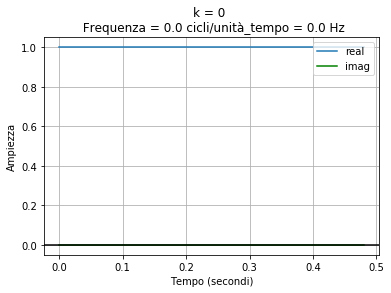

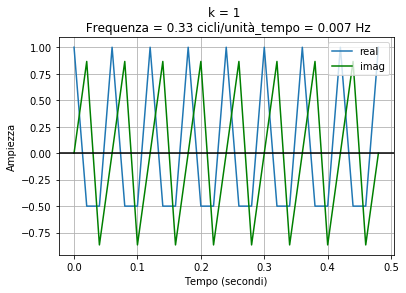

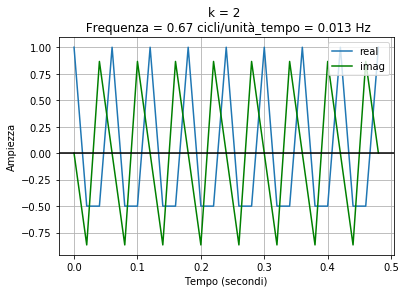

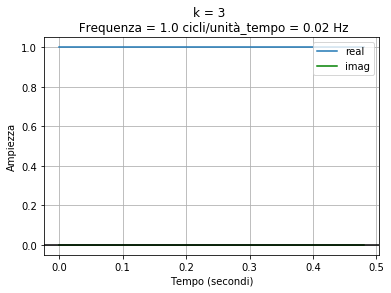

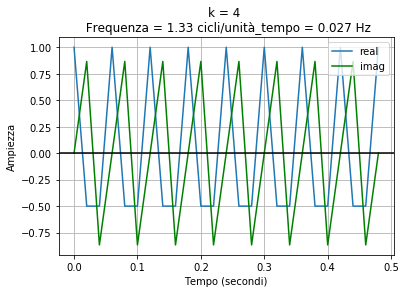

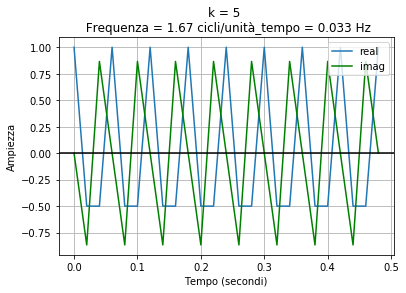

In [134]:
N = 3

fs = 50
n = np.arange(0.0, 0.5, 1/fs)
f = (1/N)/n[1]
for k in range(0, N + 3):
    x_complex = np.cos(2*np.pi*f*k*n) + 1j*np.sin(2*np.pi*f*k*n )
    plt.plot(n, x_complex.real, label = 'real')
    plt.plot(n, x_complex.imag, 'green', label = 'imag')
    f_cicli_tempo = np.round(k/N, 2)
    f_hertz = np.round((k/N)*n[1], 3)
    plt.title('k = {} \n Frequenza = {} cicli/unità_tempo = {} Hz'.format(k, f_cicli_tempo, f_hertz))
    plt.xlabel('Tempo (secondi)')
    plt.ylabel('Ampiezza')
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.legend(loc='upper right')
    plt.show()

### Segnali simmetrici (positivi e negativi)
Un segnale $x(n)$ è detto simmetrico positivamente se: 
$$
\begin{align}
x(-n) = x(n)
\end{align}
$$
Un esempio di segnale simmetrico positivo è il coseno.
Viceversa, un segnale $x(n)$ è detto simmetrico negativamente se: 
$$
\begin{align}
x(n) = -x(n)
\end{align}
$$
Un esempio di segnale simmetrico negativo è il seno.

NB: Ogni sengnale ha una componente simmetrica positiva e negativa. In particolare:
- $Ev[x(n)] = \frac{1}{2}[x(n) + x(-n)]$ #parte simmetrica positiva
- $Odd[x(n)] = \frac{1}{2}[x(n) - x(-n)]$ #parte simmetrica negativa

### Shift, Flip & Scale
Dato il segnale $x(n)$, vengono definite le seguenti operazioni:
- Shift: $\quad x(n)_{sh} = x(n + a)$
- Flip: $\quad x(n)_f = x(-n)$
- Scale $\quad x(n)_{sc} = a*x(n)$

#### Esempio
Viene di seguito proposto un esempio per chiarire queste operazioni, effettuate su un segnale x(t) che è una sequenza esponenziale di 6 valori.
$$
\begin{align}
x(n) = 2^n \qquad n = 0, 1,..., 5
\end{align}
$$
La variabile $a$ è pari a -2.

In [23]:
def plot_shift_scale_flip():
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0, 0].plot(n, x)
    axs[0, 0].set_title('Segnale originale')
    axs[0, 0].set_xlabel('n')
    axs[0, 0].set_ylabel('x(n)')
    axs[0, 0].grid(True, which='both')

    axs[0, 1].plot(n, x_sh, 'tab:orange')
    axs[0, 1].set_title('Shift')
    axs[0, 1].set_xlabel('n')
    axs[0, 1].set_ylabel('x(n+a)')
    axs[0, 1].grid(True, which='both')

    axs[1, 0].plot(n, x_f, 'tab:green')
    axs[1, 0].set_title('Flip')
    axs[1, 0].set_xlabel('n')
    axs[1, 0].set_ylabel('x(-n)')
    axs[1, 0].grid(True, which='both')

    axs[1, 1].plot(n, x_sc, 'tab:red')
    axs[1, 1].set_title('Scale')
    axs[1, 1].set_xlabel('n')
    axs[1, 1].set_ylabel('a*x(n)')
    axs[1, 1].grid(True, which='both')

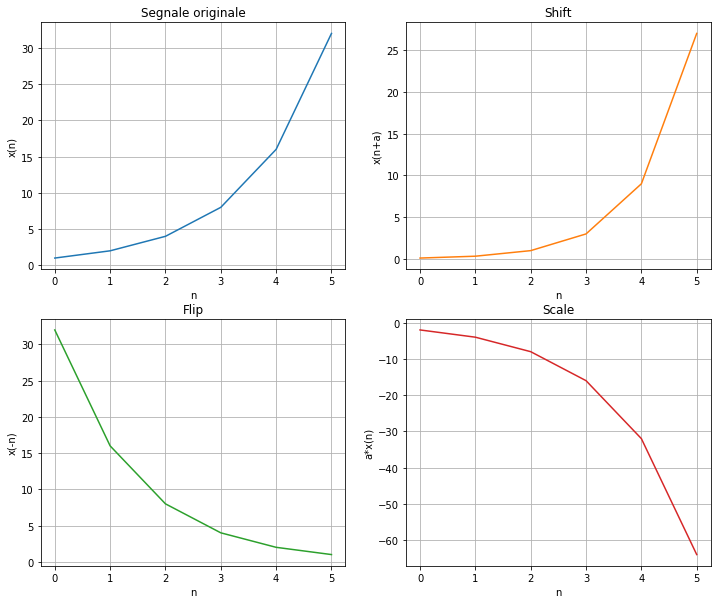

In [24]:
n = np.linspace(0, 5, 6)
x = 2**n
a = -2
x_sh = 3**(n+a)
x_f = np.flip(x)
x_sc = a*x
plot_shift_scale_flip()